In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('data1.csv')
df.head()

,Size,Bedrooms,Location,Price
0,2000,3,Urban,500000
1,1500,2,Suburban,350000
2,2500,4,Urban,750000
3,1800,3,Rural,200000
4,2200,3,Suburban,450000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Size      20 non-null     int64 
 1   Bedrooms  20 non-null     int64 
 2   Location  20 non-null     object
 3   Price     20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 768.0+ bytes


In [ ]:
df['Location'].value_counts()

,count
Location,
Urban,8
Suburban,7
Rural,5


## Data analysis

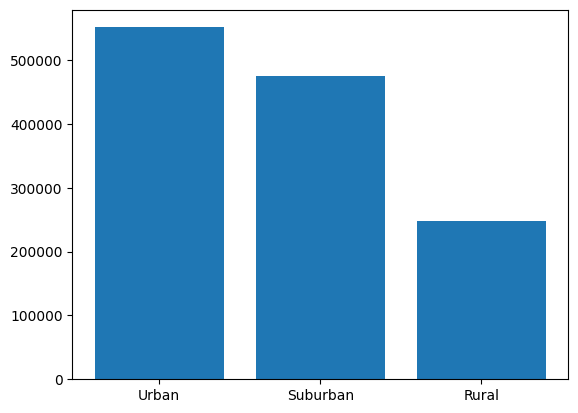

In [ ]:
price_per_location = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
prices = price_per_location.values
locations = price_per_location.index
plt.bar(height = prices,x = locations, )
plt.show()

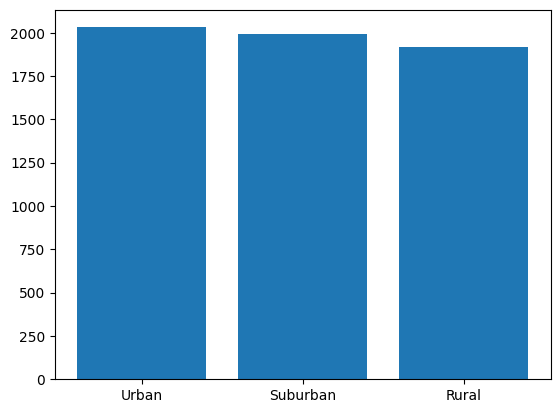

In [ ]:
size_per_location = df.groupby('Location')['Size'].mean().sort_values(ascending=False)
sizes = size_per_location.values
locations = size_per_location.index
plt.bar(height = sizes,x = locations)
plt.show()

In [ ]:
df.groupby('Location')['Size'].mean().sort_values(ascending=False)

,Size
Location,
Urban,2031.250000
Suburban,1992.857143
Rural,1920.000000


## Data Preprocessing

In [ ]:
# convert locations into categorical then numerical values
df['Location'] = df['Location'].astype('category')
df['Location'] = df['Location'].cat.codes

In [ ]:
# convert size columns to float
df['Size'] = df['Size'].astype(float)

In [ ]:
# convert price columns to float
df['Price'] = df['Price'].astype(float)

In [ ]:
# normalize the dataset so each of the feature would have the same weight
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)

In [ ]:
# split data to train and test
X = df_norm[:, :-1]
y = df_norm[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16, 3), (4, 3), (16,), (4,))

## Train a Linear Regression Model

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
pred = lr.predict(x_test)

In [ ]:
mean_squared_error(y_test, pred, squared=False)

0.3349122949832933